# ROB 311 - TP 3
## Q-Learning
### David VELASQUEZ OSPINA
### Ricardo RICO URIBE

---

## Coded Functions

---

In [ ]:
def __init__(self, **args):
        ReinforcementAgent.__init__(self, **args)

        self.qTable = util.Counter()

We initialise the Q table as a counter, a modified dictionary with added capabilities. This is important as we need the values to be not null from undetermined keys until they are assigned.

This table assigs a pair of state and action a "Q" value

---

In [ ]:
def getQValue(self, state, action):
        return self.qTable[(state, action)]

Returns the Q value saved with the keys state and action, this is similar to a value in a 2 coordinate system.

---

In [ ]:
def computeValueFromQValues(self, state):
    legalActions = self.getLegalActions(state)
    semiQTable = util.Counter()

    if len(legalActions) == 0:
        return 0.0
    else:
        for action in legalActions:
        semiQTable[action] = self.getQValue(state,action)
    return semiQTable[semiQTable.argMax()]

We want to return the value corresponging to the optimal policy of a state, this means to return the max value between all the values for each action in an specified state.

If the state has no legal actions, we return 0, if there are legal actions we save them with their corresponging value in a new dictionary, and then we return the biggest value saved in it. We use the function "argMax()" from the class "Counter" which returns the key with the maximal value, but as we need the value not the key, we use the key as the search term of the dictionary.

---

In [ ]:
def computeActionFromQValues(self, state):
    legalActions = self.getLegalActions(state)
    semiQTable = util.Counter()

    if len(legalActions) == 0:
        return None
    else:
        for action in legalActions:
        semiQTable[action] = self.getQValue(state,action)
    return semiQTable.argMax()

We first save all legal actions, if there are none we return this. otherwise we save all posible actions with their q value and with the use of the "argMax()" function we return the action with the bigger Q value

---

In [ ]:
def getAction(self, state):
    legalActions = self.getLegalActions(state)
    action = None
    
    if len(legalActions) != 0:
        if util.flipCoin(self.epsilon):
        action = random.choice(legalActions)
        else:
        action = self.computeActionFromQValues(state)
    return action

To change between exploration and exploitation we use the value epsilon to determine if we are going to read from the Q table (exploitation) or to perform a random action (exploration). When exploiting the action performed will be the optimal one.


---

In [ ]:
def update(self, state, action, nextState, reward):
    oldQ = self.getQValue(state, action)
    nextStateQ = self.computeValueFromQValues(nextState)
    self.qTable[state, action] = (1 - self.alpha)*oldQ + self.alpha*(reward + self.discount*nextStateQ)

To update the Q table we use the Q-learning funcion (seen below) based of the optimal value function. This function takes into account the state which will be reached when the action is performed, as well as the learning rate and the discount rate, alpha or learning rate indicates how much the Q table will be overwritten rather than saving the same value. The discount rate decides how much of the future state value will affect the current state.

The Q table is updated constantly during the learning face (while there are uncompleted learning episodes) after this, there are no more updates an the agent only reads the table to perform the optimal action.

![image](./images/Q_formula.jpeg)
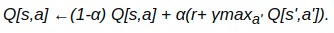

---

## Results

At the beggining of the training, the agent doesn't know the environment and doesn't have the Q table to provide him with optimal policies, so it just performs random actions. Resulting in bad actions and low scores as seen in the results with only 10 training episodes.

![image](./images/training_game.jpeg)

![image](./images/training_console.jpeg)

---

After 2000 training episodes and 10 test runs, the agent has a table that allows him to always win and obtain a good score.

![image](./images/test_game.jpeg)

![image](./images/test_console.jpeg)

The agent learned by reinforced learning the optimal action for every posible state, allowing him to always emerge victorious and to avoid the ghost. This was possible thanks to the learning episodes, with 2000 we can ensure that the Q table is complete and optimal.